C:\Users\paulk\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


     first_peak  second_peak  second_last_peak  last_peak  first_peak_2  \
0      1.101675     4.122714          4.122714   1.772473      3.427435   
1      4.112922     0.166475          0.494530   3.481294      0.572871   
2      1.625583     4.122714          4.117818   1.733303      3.398057   
3      2.918216     0.044067          0.690383   3.344197      0.563079   
4      1.738199     4.122714          4.122714   1.787162      3.388264   
5      2.981868     0.034274          0.612042   3.358886      1.042919   
6      1.934052     4.122714          4.127611   1.630480      3.437227   
7      3.011246     0.288884          0.558182   3.544947      1.145742   
8      1.003749     4.122714          3.593910   2.085839      3.770178   
9      3.495983     0.034274          0.856859   3.432331      1.870400   
10     1.439523     4.122714          4.098233   1.885089      3.373575   
11     3.177722     0.044067          0.494530   3.657563      1.449315   
12     1.243669     4.122

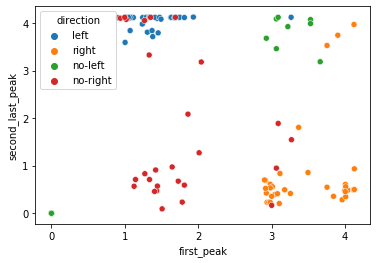

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns


class knn_learn:
    def __init__(self):
        pass
    
    def fill_invalid(self, df):
        rows = len(df.iloc[:,0])
        cols = len(df.columns.tolist())
        for i in range(rows):
            for j in range(cols):
                if(pd.isna(df.iloc[i,j]) == True):
                    df.iloc[i,j] = 0
                if(df.iloc[i,j] == 9999):
                    df.iloc[i,j] = 1
        
        return df

    def create_test_data(self, df, test_size):
        temp_df = df
        df_cols = df.columns.tolist()
        test_df = pd.DataFrame([], columns=df_cols)

        for i in range(test_size):
            r = random.randint(0, len(temp_df)) if random.randint(0, len(temp_df)) != len(temp_df)-1 else random.randint(0, len(temp_df)) - 1
            test_df.loc[len(test_df)] = temp_df.iloc[r, :]

            temp_df = temp_df.drop(r)
            temp_df.reset_index(drop=True, inplace=True)

        return temp_df, test_df

    def euclidian_distance(self, test_pt, neighbour_pt, dim=2):
        '''
        calculate the euclidian distance
        '''

        #data pts should be passed in as an array of pts
        distance = 0.0
        for i in range(0, dim):
            distance += (test_pt[i] - neighbour_pt[i])**2
        distance = distance**(1/2)
        return distance

    def get_neighbour(self, train, test_row, num_neighbours, dim=2):
        '''
        this function creates an array of values for all datapoints to the input pts
        :param train:
        :param test_row:
        :param num_neighbours:
        :return:
        '''

        distances = list()
        rows = len(train.iloc[:,0])
        for i in range(rows):
            #now calculate the distance between pts
            dist = self.euclidian_distance(test_row, list(train.iloc[i, 0:dim]), dim=dim)
            train_row = train.iloc[i, 0:dim]
            distances.append((list(train_row)+[i], dist))

        distances.sort(key=lambda tup : tup[1])
        neighbours = list()
        for i in range(num_neighbours):
            neighbours.append(distances[i][0])
        return neighbours

    def decision(self, train, neighbours, actual, label):
        '''grab the nearest neighbours and determine the majority class'''
        classes = dict()
        print(train)
        for n in neighbours:
            if(train.loc[n[-1]][label] not in classes.keys()):
                classes[train.loc[n[-1]][label]] = 0
            classes[train.loc[n[-1]][label]] += 1/len(neighbours)

        m_value = max(classes.values())
        m_keys = [k for k, v in classes.items() if v == m_value]

        return m_keys[0], m_value, actual

class test_knn:
    def __init__(self, input_data):
        self.data = input_data
        self.knn = knn_learn()

    def test_distance_method(self, data, method='euclidean'):
        if(method == 'euclidean'):
            e_distance = []
            base = data[0]
            for element in data:
                e_distance.append(self.knn.euclidian_distance(base, element, dim=6))
            self.print_test_output(method, data, e_distance)


    def print_test_output(self, method, input_data, method_return):
        if(method == 'euclidean'):
            print("Euclidean distance results: ")
            print("Pts")
            for pts in range(len(input_data)):
                print("Pts: {0}, {1} | Given distance: {2}".format(input_data[pts][0], input_data[pts][1], method_return[pts]))



if __name__=="__main__":
   
    file = "../new_datas_sys2.csv"
    data = pd.DataFrame(pd.read_csv(file))

    #can select according to a list of headings
    df = data[["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2",	"second_peak_2", "second_last_peak_2", "last_peak_2",
               "Gradient_1", "Gradient_2", "direction"]]
    
    knn = knn_learn()
    df = knn.fill_invalid(df)
    
    sns.scatterplot(data=df, x="first_peak", y="second_last_peak",hue="direction")
    """sns.scatterplot(data=df, x="first_peak", y="last_peak",hue="direction")
    sns.scatterplot(data=df, x="first_peak", y="first_peak_2",hue="direction")
    sns.scatterplot(data=df, x="first_peak", y="second_peak_2",hue="direction")
    sns.scatterplot(data=df, x="first_peak", y="second_last_peak_2",hue="direction")
    sns.scatterplot(data=df, x="first_peak", y="Gradient_1",hue="direction")
    sns.scatterplot(data=df, x="first_peak", y="Gradient_2",hue="direction")"""


    knn = knn_learn()
    train,test = knn.create_test_data(df, 10)
    neighbours = knn.get_neighbour(train, test.loc[0], 7)
    classes, probability, actual = knn.decision(train, neighbours, test['direction'][0], 'direction')

    print("return decision: {} with probability: {}".format(classes, probability))
    print("actual label: {}".format(actual))



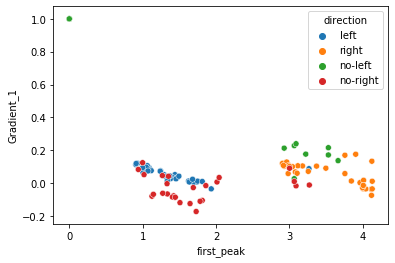

In [41]:

sns.scatterplot(data=df, x="first_peak", y="Gradient_1",hue="direction")

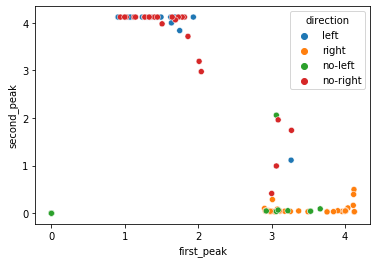

In [43]:
#["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2",	"second_peak_2", "second_last_peak_2", "last_peak_2",
               #"Gradient_1", "Gradient_2", "direction"]
    
sns.scatterplot(data=df, x="first_peak", y="second_peak",hue="direction")

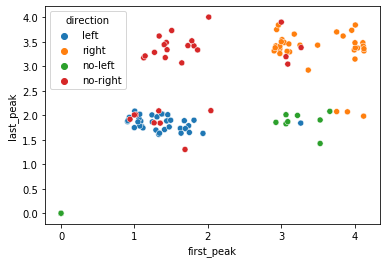

In [49]:
sns.scatterplot(data=df, x="first_peak", y="last_peak",hue="direction")

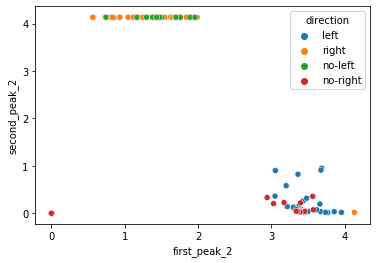

In [48]:
sns.scatterplot(data=df, x="first_peak_2", y="second_peak_2",hue="direction")

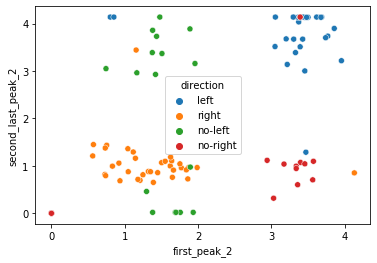

In [47]:
sns.scatterplot(data=df, x="first_peak_2", y="second_last_peak_2",hue="direction")

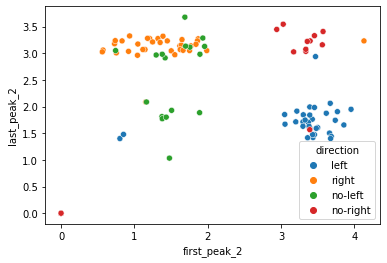

In [46]:
sns.scatterplot(data=df, x="first_peak_2", y="last_peak_2",hue="direction")

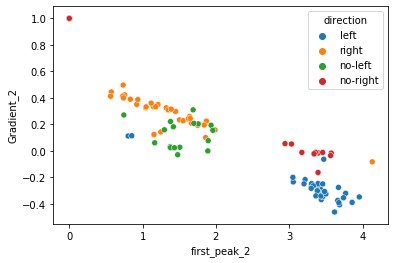

In [45]:
sns.scatterplot(data=df, x="first_peak_2", y="Gradient_2",hue="direction")

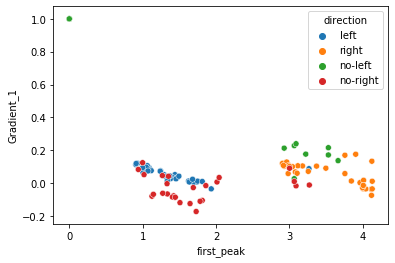

In [44]:
sns.scatterplot(data=df, x="first_peak", y="Gradient_1",hue="direction")

Correlations
[[ 1.    -0.595 -0.22   0.661 -0.399  0.529 -0.204  0.219 -0.448  0.255]
 [-0.595  1.     0.582 -0.139  0.505 -0.909  0.368 -0.522 -0.418 -0.278]
 [-0.22   0.582  1.    -0.425  0.332 -0.465  0.647 -0.508 -0.244 -0.369]
 [ 0.661 -0.139 -0.425  1.    -0.192  0.044 -0.371  0.118 -0.722  0.288]
 [-0.399  0.505  0.332 -0.192  1.    -0.428  0.631  0.253 -0.115 -0.913]
 [ 0.529 -0.909 -0.465  0.044 -0.428  1.    -0.206  0.602  0.414  0.124]
 [-0.204  0.368  0.647 -0.371  0.631 -0.206  1.    -0.128 -0.077 -0.79 ]
 [ 0.219 -0.522 -0.508  0.118  0.253  0.602 -0.128  1.     0.27  -0.352]
 [-0.448 -0.418 -0.244 -0.722 -0.115  0.414 -0.077  0.27   1.    -0.011]
 [ 0.255 -0.278 -0.369  0.288 -0.913  0.124 -0.79  -0.352 -0.011  1.   ]]
[('last_peak_2', (0.17976491808236428, 2.95)), ('second_last_peak', (0.18572584645104023, 3.5500000000000003)), ('first_peak', (0.20590397216013934, 2.9000000000000004)), ('second_last_peak_2', (0.21348386054369123, 3.0)), ('second_peak_2', (0.234454070417

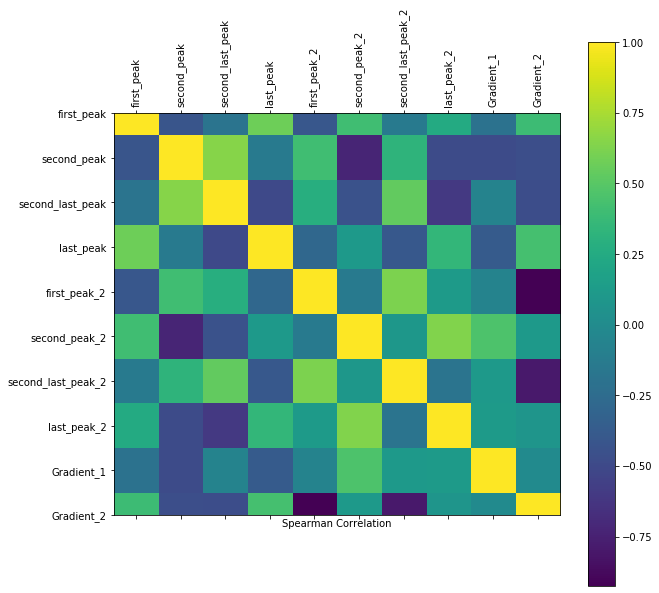

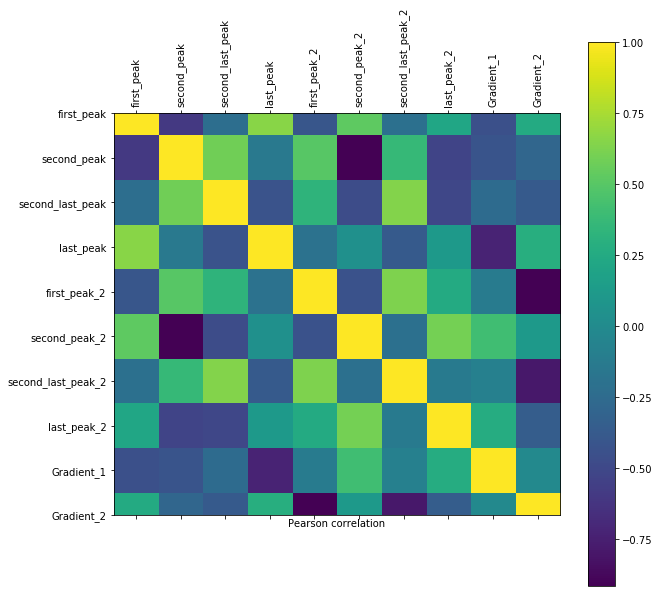

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
corr, _ = stats.spearmanr(df['first_peak'], df['Gradient_1'])
features = ["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2",	"second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"]
M = len(features)
mat = np.zeros((M,M))

for i in range(M):
    for j in range(M):
        t, _ = stats.spearmanr(df[features[i]], df[features[j]])
        mat[i,j] = round(t,3)
        
"""mat = pd.DataFrame(mat, columns = features, index = features)
mat.pivot_table()"""
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(mat)
fig.colorbar(cax)

xaxis = np.arange(len(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2",	"second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"]))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)

ax.set_xticklabels(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2", "second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"], rotation=90)
ax.set_yticklabels(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2", "second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"])
ax.set_xlabel("Spearman Correlation")

#now lets create a list of elements with sufficiently high correlations
corr_high = list()
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        if(i != j and np.abs(mat[i,j]) >= 0.6):
            corr_high.append((features[i], features[j]))

        
mat_pearson = np.zeros((M,M))        
for i in range(M):
    for j in range(M):
        t, _ = stats.pearsonr(df[features[i]], df[features[j]])
        mat_pearson[i,j] = round(t,3)       
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(mat_pearson)
fig.colorbar(cax)

print("Correlations")
print(mat_pearson)

xaxis = np.arange(len(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2",	"second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"]))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)

ax.set_xticklabels(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2", "second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"], rotation=90)
ax.set_yticklabels(["first_peak","second_peak","second_last_peak", "last_peak", "first_peak_2", "second_peak_2", "second_last_peak_2", "last_peak_2","Gradient_1", "Gradient_2"])
ax.set_xlabel("Pearson correlation")


##now to determine the best information gain of the following features at initial splits
'''
second_peak - 2
seond_last_peak - 2
first_peak - 2
second_peak_2 - 4
second_last_peak_2 - 2
last_peak_2 - 2

'''

test_features = ["second_peak","second_last_peak" ,"first_peak","second_peak_2" ,"second_last_peak_2" ,"last_peak_2"]

def gini_impurity(data):
    '''returns the impurity of the set of data - this measure is unweighted'''
    '''split the data according to the condition'''
    if(len(data[data.columns.tolist()[0]].tolist()) == 0):
        return 0, {}
    if(isinstance(data[data.columns.tolist()[0]].tolist()[0], float)):
        '''grab impurity, grab the probabilities'''
        l = len(data[data.columns.tolist()[1]])
        labels = data[data.columns.tolist()[1]].unique()
        classes = dict()
        
        '''
        calc probs
        '''
        for lb in labels:
            d = data[data[data.columns.tolist()[1]] == lb]
            di = d[d.columns.tolist()[0]].tolist()
            classes[lb] = sum([1 for index in range(len(di))])/l
                   
        gini = 1 - sum([p**2 for k,p in classes.items()])
                   
    return gini, classes

   
    

def max_information_gain(data, percision):
    labeled_data, l = data[data.columns.tolist()[-1]], len(data[data.columns.tolist()[-1]])
    d = data[data.columns.tolist()[0]].tolist()
    cols = data.columns.tolist()
    _min, _max = int(float(np.min(data[cols[0]]))), int(float(np.max(data[cols[0]])))
    
    inter_range = np.arange(_min, _max+percision, percision)
    max_gain, condition = 0, 0
    parent_information, _ = gini_impurity(data)
    
    for cond in inter_range:
        left = data[data[cols[0]] >= cond]
        right = data[data[cols[0]] < cond]
        
        lg, lc = gini_impurity(left)
        rg, rc = gini_impurity(right)
        Nl, Nr = len(left.iloc[:,0]), len(right.iloc[:,0])
        
        temp_gain = parent_information - (Nl/l)*lg - (Nr/l)*rg
        
        
        if(temp_gain >= max_gain):
            max_gain, condition = temp_gain, cond
        
    return max_gain, condition

#now lets detemrine the greatest information gain from the first split out of these
gains = dict()
for feat in test_features:
    t_gain, cond = max_information_gain(df[[feat, 'direction']], 0.05)
    gains[feat] = (t_gain, cond)

print(sorted(gains.items(), key =lambda x:x[1]))
               
        
        


In [10]:

temp = df[df['direction'] == 'no-left']

temp = temp[['first_peak', 'direction']]
condition = 2.5
t = temp[temp.columns.tolist()[0]]
t = t.tolist()

print(t)
p = sum([1 for index in range(len(t)) if t[index] >= condition])/len(t)
print(p)

[0.0, 0.0, 0.0, 0.0, 0.0, 3.530257823, 2.9280085689999997, 3.221788693, 0.0, 0.0, 3.06510596, 3.0895876369999997, 3.530257823, 3.6624588780000003, 0.0, 0.0, 3.06510596]
0.47058823529411764


# Now displaying the information gain
